# **Task**

**Propulsion: Which customers are likely to churn? What are the attributes that make you think so?**

**Kaggle:**

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

Description of the data (with the calculation of basic statistics);
Research of dependencies and formulation of hypotheses;
Building models for predicting the outflow (with justification for the choice of a particular model) based on tested hypotheses and identified relationships;
Comparison of the quality of the obtained models.

**The features:**

customerID - customer id

gender - client gender (male / female)

SeniorCitizen - is the client retired (1, 0)

Partner - is the client married (Yes, No)

tenure - how many months a person has been a client of the company

PhoneService - is the telephone service connected (Yes, No)

MultipleLines - are multiple phone lines connected (Yes, No, No phone service)

InternetService - client’s Internet service provider (DSL, Fiber optic, No)

OnlineSecurity - is the online security service connected (Yes, No, No internet service)

OnlineBackup - is the online backup service activated (Yes, No, No internet service)

DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

TechSupport - is the technical support service connected (Yes, No, No internet service)

StreamingTV - is the streaming TV service connected (Yes, No, No internet service)

StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)

Contract - type of customer contract (Month-to-month, One year, Two year)

PaperlessBilling - whether the client uses paperless billing (Yes, No)

PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - current monthly payment

TotalCharges - the total amount that the client paid for the services for the entire time

Churn - whether there was a churn (Yes or No)

# **Load Dependencies**

In [ ]:
#General
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import math

#Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import re

#Preprocessing
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTENC #for oversampling the minority class i.e. generating synthetic samples
from imblearn.under_sampling import RandomUnderSampler #for undersampling the majority class

#Pipeline and modules
from sklearn.pipeline import Pipeline

In [ ]:
#!pip install pycaret

In [ ]:
#!pip install interpret

# **Load Data**

In [ ]:
df=pd.read_csv("telecom_users.csv",na_values=["unknown", " ", "nonexistent", "UNKNOWN"])
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


# **Supervised Machine Learning**

Classification problem

# **1. Data Understanding**

## **General feature understanding**

In [ ]:
#Number of features
df.shape

(5986, 22)

In [ ]:
#Type
df.dtypes
#--> Remove "Unnamed:0", "Customer ID"; convert "Total Charges" to numeric

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#Are there any duplicates in "Customer ID" --> no duplicates
(df["customerID"].value_counts()>1).sum()

0

In [ ]:
#Delete columns "Unnamed" and "Customer ID"
df=df.drop(columns=["Unnamed: 0", "customerID"])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [ ]:
#Missing values --> there are 10 missin gvalues in "TotalCharges"
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [ ]:
#Are there other missing values (other than na)
unique_calues=[df[col].unique() for col in df ]
unique_calues

[array(['Male', 'Female'], dtype=object),
 array([0, 1]),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array([72, 44, 38,  4,  2, 70, 33,  1, 39, 55, 52, 30, 60, 50, 32, 51, 69,
        42, 14, 62,  5, 63, 67, 40, 65, 16, 46, 11, 49, 68, 10, 53, 54, 15,
         3, 71,  8, 64, 57, 20, 26, 31,  7, 35,  6, 13, 23,  9, 45, 17, 34,
        58, 12, 25, 28, 29, 43, 19, 41, 37, 27, 22, 24, 18, 56, 66, 59, 48,
        47, 61, 21,  0, 36]),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No', 'No phone service'], dtype=object),
 array(['No', 'Fiber optic', 'DSL'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object),
 array(['No internet service', 'Yes', 'No'], dtype=object),
 array(['No internet service', 'Yes', 'No'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object),
 array(['No internet service', 'Yes', 'No'], dtype=object),
 array(['No internet service', 'No', 'Yes'], dtype=object),
 array(['Two year', 'Month-t

In [ ]:
#Changing data types: total charges to numeric
pd.to_numeric(df["TotalCharges"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [ ]:
#Change columns "SeniorCitizen" values to Yes and No
df["SeniorCitizen"] = df["SeniorCitizen"].replace({0: 'No', 1: 'Yes'})

In [ ]:
#Change response variable "Churn" values to 0 and 1
df["Churn"] = df["Churn"].replace({'No': 0, 'Yes': 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   object 
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [ ]:
#Check for number of categories for categorical variables
df.select_dtypes(include=["object"]).apply(lambda col: len(col.unique()))

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

## **Check for Data Leakage**

In [ ]:
# from the description it seems like there is no data leakage

## **Feature Distribution**

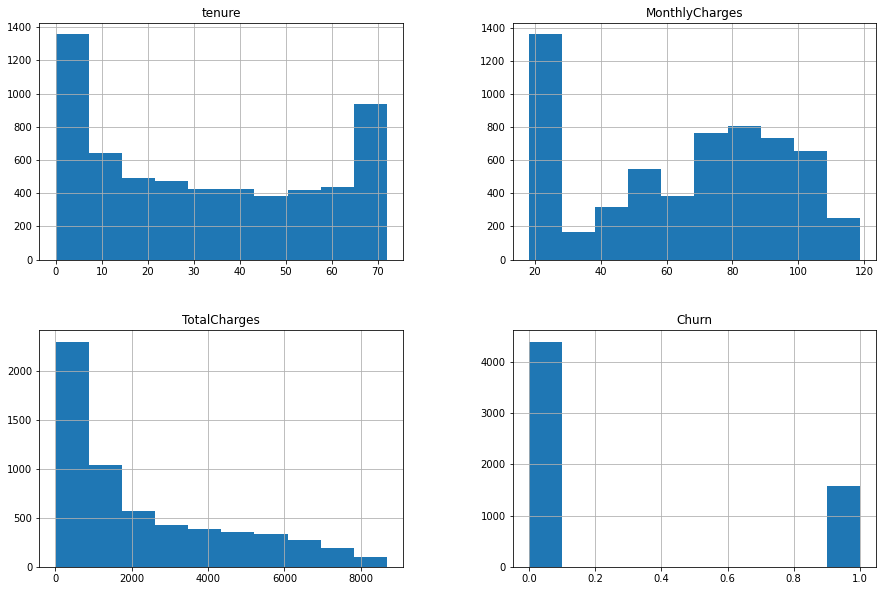

In [ ]:
#Histogramm of numerical variables
df.hist(figsize=(15,10))
None

## **Check for Correlation among the features**

In [ ]:
categorical_features=df.select_dtypes(include=["object","category"])
categorical_features

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Male,No,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
1,Female,No,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic)
2,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
3,Male,No,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
4,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,No,Yes,No,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
5982,Female,No,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
5983,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check
5984,Male,Yes,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check


In [ ]:
numerical_features=df.select_dtypes(exclude=["object","category"])
numerical_features

,tenure,MonthlyCharges,TotalCharges,Churn
0,72,24.10,1734.65,0
1,44,88.15,3973.20,0
2,38,74.95,2869.85,1
3,4,55.90,238.50,0
4,2,53.45,119.50,0
...,...,...,...,...
5981,1,95.00,95.00,1
5982,23,91.10,2198.30,0
5983,12,21.15,306.05,0
5984,12,99.45,1200.15,1


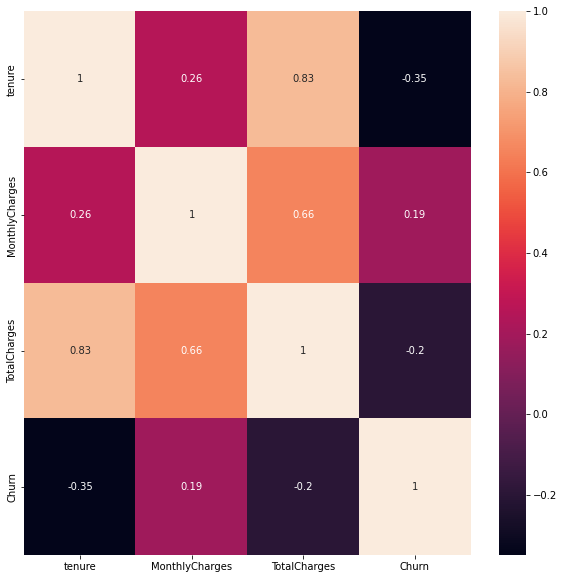

In [ ]:
#Correlation between numerical variables
plt.figure(figsize=(10,10))
sns.heatmap(numerical_features.corr(), annot=True);
# --> strong correlation between tenure and Total Charges

## **Check for imbalance**

In [ ]:
#Barplot of our target variable "Churn"
df["Churn"].value_counts()
#--> pretty imbalanced

0    4399
1    1587
Name: Churn, dtype: int64

## **Outlier Detection**

### **Boxplot**

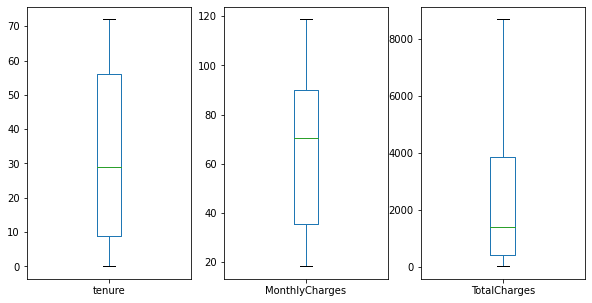

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
numerical_features["tenure"].plot.box()
plt.subplot(1,3,2)
numerical_features["MonthlyCharges"].plot.box()
plt.subplot(1,3,3)
numerical_features["TotalCharges"].plot.box()
plt.show()
# --> no outliers

# **2. Data Preparation (cleaning) & Preprocessing**

## **Duplicates**

In [ ]:
#deleted above

## **Transformation**

## **Standardization**

In [ ]:
#see pipeline

## **Encoding**

In [ ]:
#see pipeline

## **Imputation**

In [ ]:
#see pipeline

## **Maybe delete Outliers**

In [ ]:
#no outliers

## **Data Selection and Engineering**

In [ ]:
# see above: data selection

## **Impute numerical data**

-Imputation: not in the pipeline, as we have to do it before the upsampling (SMOTENC)

In [ ]:
#Categorical vs. numerical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features, numeric_features

(['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'],
 ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])

In [ ]:
imputer = KNNImputer(n_neighbors=5)
df[numeric_features] = imputer.fit_transform(df[numeric_features])

In [ ]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## **Split data**

In [ ]:
X=df.drop(["Churn"], axis=1)
y=df["Churn"]

In [ ]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0, stratify=y) #keeps the distribution of classes similar in training and test

print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (4190, 19)
Size of test set: (1796, 19)


In [ ]:
categorical_feature_idxs = np.where(X_train.dtypes == "object")[0]
categorical_feature_idxs

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

## **Handling data imbalance**

-upsampling with SMOTENC

In [ ]:
smtnc = SMOTENC(categorical_features=categorical_feature_idxs)
X_train_smote, y_train_smote = smtnc.fit_resample(X_train, y_train)

In [ ]:
features = X_train.columns
X_train_smote = pd.DataFrame(X_train_smote, columns=features)
X_train_smote.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,No,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.20,181.10
1,Male,No,Yes,No,31.0,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30,2484.00
2,Female,No,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65
3,Male,No,No,No,16.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80
4,Male,No,Yes,Yes,9.0,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,101.50,906.85


In [ ]:
y_train_smote = pd.DataFrame(y_train_smote, columns=['Churn'])
y_train_smote.head()

,Churn
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
y_train_smote.value_counts()

Churn
1.0      3079
0.0      3079
dtype: int64

## **Create pipeline**

In [ ]:
# Make sure to drop the Churn from the categorical features
numeric_features.remove('Churn')
numeric_features

['tenure', 'MonthlyCharges', 'TotalCharges']

Here the pipeline is defined. We do not consider imputer for numerical variables because we have imputed above to apply the SMOTENC (to cope with the data imbalance).

In [ ]:
categorical_transformer = Pipeline(steps=[
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                          ])

numeric_transformer = Pipeline(steps=[
                                      #("knn_imputer", KNNImputer(n_neighbors=5)), 
                                      ("power", PowerTransformer()),
                                      ("scaler", StandardScaler())
                                      ])

preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, 
                                                       numeric_features),
                                               ("cat", categorical_transformer, 
                                                       categorical_features)
                                               ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('power', PowerTransformer()),
                                                 ('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

# **3. Supervised Machine Learning: Modelling, Tuning & Evaluation**

## **Preprocessing Pipeline**

In [ ]:
X_train_smote.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,No,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.20,181.10
1,Male,No,Yes,No,31.0,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30,2484.00
2,Female,No,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65
3,Male,No,No,No,16.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80
4,Male,No,Yes,Yes,9.0,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,101.50,906.85


In [ ]:
X_train_smote_pre = preprocessor.fit_transform(X_train_smote)

In [ ]:
df_smote = pd.DataFrame(X_train_smote_pre)
df_smote

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,-1.331413,0.408227,-1.013668,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.450225,0.375524,0.618289,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.533914,-1.620790,-1.853695,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.147781,-1.641273,-0.716950,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.573196,1.197769,-0.112710,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6153,-0.573196,0.294263,-0.269879,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6154,-1.533914,0.416669,-1.367377,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6155,-0.298113,0.928717,0.100133,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6156,-0.487742,0.723109,-0.117631,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## **Model Selection (Auto ML)**

In [ ]:
!pip install catboost

In [ ]:
# check version
from pycaret.utils import version
version()

'2.3.4'

In [ ]:
from pycaret.classification import *

reg = setup(data=pd.concat([X_train_smote, y_train_smote], axis=1),
            target = 'Churn',
            session_id=13,
            log_experiment=True,
            experiment_name='ml_challenge2',
            normalize = True,       # We scale data using the standard scaler
            transformation = True)  # We transform the distibutions with boxcox

,Description,Value
0,session_id,13
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(6158, 20)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models(fold=3, sort = 'f1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8364,0.9075,0.8599,0.8256,0.8423,0.6725,0.6732,4.5967
lightgbm,Light Gradient Boosting Machine,0.8306,0.9051,0.8517,0.8218,0.8363,0.6610,0.6616,0.2933
rf,Random Forest Classifier,0.8306,0.9073,0.8416,0.8281,0.8347,0.6611,0.6613,0.8200
gbc,Gradient Boosting Classifier,0.8190,0.9000,0.8512,0.8043,0.8270,0.6376,0.6389,0.5300
et,Extra Trees Classifier,0.8116,0.8950,0.8165,0.8137,0.8150,0.6231,0.6233,0.7767
knn,K Neighbors Classifier,0.7961,0.8637,0.8759,0.7597,0.8136,0.5909,0.5983,0.3033
ada,Ada Boost Classifier,0.7995,0.8823,0.8380,0.7830,0.8095,0.5985,0.6000,0.2400
lda,Linear Discriminant Analysis,0.7937,0.8759,0.8307,0.7785,0.8037,0.5869,0.5883,0.0400
lr,Logistic Regression,0.7951,0.8757,0.8229,0.7847,0.8033,0.5898,0.5907,1.0967
ridge,Ridge Classifier,0.7926,0.0000,0.8298,0.7773,0.8026,0.5846,0.5860,0.0267


## **3 models with highest accuracy**

### **Light Gradient Boosting Classifier**

In [ ]:
# Using PyCaret with a stratified 10-fold CV
lightgbm_autoML = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8097,0.9081,0.8539,0.7890,0.8202,0.6189,0.6210
1,0.8422,0.9150,0.8584,0.8356,0.8468,0.6842,0.6845
2,0.8283,0.9122,0.8858,0.7984,0.8398,0.6559,0.6600
3,0.8329,0.9081,0.8402,0.8326,0.8364,0.6658,0.6658
4,0.8190,0.9068,0.8767,0.7901,0.8312,0.6373,0.6413
5,0.8237,0.9083,0.8219,0.8295,0.8257,0.6473,0.6473
6,0.8306,0.9041,0.8813,0.8042,0.8410,0.6606,0.6638
7,0.8028,0.8806,0.8082,0.8045,0.8064,0.6054,0.6054
8,0.8144,0.9059,0.8219,0.8145,0.8182,0.6286,0.6286
9,0.8631,0.9314,0.8682,0.8643,0.8662,0.7261,0.7261


In [ ]:
# Importing LGBM model to be applied in the pipeline
from lightgbm import LGBMClassifier

lightgbm = LGBMClassifier()

In [ ]:
#Creating pipeline for Light Gradient Boosting Machine
from sklearn import set_config
set_config(display='diagram')

pipeline_lightgbm = Pipeline([("pre_process", preprocessor), 
                         ("model", lightgbm)])
pipeline_lightgbm

Pipeline(memory=None,
         steps=[('pre_process',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('power',
                                                                   PowerTransformer(copy=True,
                                                                                    method='yeo-johnson',
                                                                                    standardize=True)),
                                                                  ('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['tenur...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [ ]:
# Cross validation using a stratified CV 10-fold 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline_lightgbm, X_train_smote, y_train_smote, cv=10, scoring='f1')
scores

array([0.68430335, 0.71631206, 0.71119134, 0.79522184, 0.90468986,
       0.90468986, 0.90881459, 0.89655172, 0.88989442, 0.89090909])

In [ ]:
# What if we ran the code on the upsampling? Even worse...
scores_1 = cross_val_score(pipeline_lightgbm, X_train, y_train, cv=10, scoring='f1')
scores_1

array([0.60986547, 0.49494949, 0.54455446, 0.5625    , 0.60204082,
       0.58415842, 0.60204082, 0.58064516, 0.44791667, 0.57560976])

The cross validations scores are not the most stable, they show that there might be outliers in our dataset.

In [ ]:
# Use to check potential scoring
#sorted(sklearn.metrics.SCORERS.keys()) 

In [ ]:
# Checking the test accuracy
from sklearn.metrics import classification_report, confusion_matrix 

pipeline_lightgbm.fit(X_train_smote, y_train_smote)
y_pred = pipeline_lightgbm.predict(X_test)

class_labels = pipeline_lightgbm.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85      1320
         1.0       0.58      0.63      0.60       476

    accuracy                           0.78      1796
   macro avg       0.72      0.73      0.72      1796
weighted avg       0.79      0.78      0.78      1796



,0.0,1.0
0.0,1100,220
1.0,176,300


#### Hyperparameter tunning using GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

random_search = {'learning_rate': [0.001, 0.01 , 0.05, 0.1],
                 'num_leaves': [10, 50, 100],
                 'reg_lambda': [0.1, 0.2, 0.4],
                 'n_estimators': [100, 120, 150]}

tune_pipeline_lightgbm = GridSearchCV(estimator=lightgbm, 
                           param_grid=random_search,
                           scoring='f1',
                           cv=5, verbose=1, n_jobs=-1)

tune_pipeline_lightgbm.fit(X_train_smote_pre, y_train_smote)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.5s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, catego

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'n_estimators': [100, 120, 150],
                         'num_leaves': [10, 50, 100],
                         'reg_lambda': [0.1, 0.2, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [ ]:
# best model
best_model = tune_pipeline_lightgbm.best_estimator_
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=100, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.1, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
scores = cross_val_score(best_model, X_train_smote_pre, y_train_smote, cv=10, scoring='f1')
scores

array([0.67269439, 0.72824156, 0.70143885, 0.78521127, 0.92145015,
       0.89686099, 0.91818182, 0.9011976 , 0.90060241, 0.9039039 ])

In [ ]:
X_test_pre = preprocessor.fit_transform(X_test)
tuned_pred_gridCV = best_model.predict(X_test_pre)
print(confusion_matrix(y_test,tuned_pred_gridCV))
print(classification_report(y_test,tuned_pred_gridCV))

[[1050  270]
 [ 139  337]]
              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84      1320
         1.0       0.56      0.71      0.62       476

    accuracy                           0.77      1796
   macro avg       0.72      0.75      0.73      1796
weighted avg       0.80      0.77      0.78      1796



#### Hyperparameter tunning using AutoML

In [ ]:
tuned_lightgbm_autoML = tune_model(lightgbm_autoML, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8260,0.8920,0.9132,0.7812,0.8421,0.6509,0.6608
1,0.8422,0.9083,0.8904,0.8159,0.8515,0.6839,0.6869
2,0.8097,0.8988,0.8995,0.7665,0.8277,0.6183,0.6282
3,0.8306,0.9050,0.8813,0.8042,0.8410,0.6606,0.6638
4,0.7958,0.9087,0.8995,0.7490,0.8174,0.5902,0.6030
5,0.8074,0.9002,0.8265,0.8009,0.8135,0.6145,0.6149
6,0.8190,0.8952,0.9041,0.7765,0.8354,0.6370,0.6461
7,0.8213,0.8772,0.8813,0.7910,0.8337,0.6419,0.6463
8,0.7958,0.8827,0.8676,0.7631,0.8120,0.5906,0.5965
9,0.8538,0.9296,0.9136,0.8204,0.8645,0.7068,0.7117


In [ ]:
autoML_tuned_param = tuned_lightgbm_autoML.get_params()
autoML_tuned_param

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.001,
 'max_depth': -1,
 'min_child_samples': 6,
 'min_child_weight': 0.001,
 'min_split_gain': 0.7,
 'n_estimators': 120,
 'n_jobs': -1,
 'num_leaves': 80,
 'objective': None,
 'random_state': 13,
 'reg_alpha': 0.01,
 'reg_lambda': 0.7,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'feature_fraction': 0.5,
 'bagging_freq': 1,
 'bagging_fraction': 0.8}

In [ ]:
lightgbm = LGBMClassifier(autoML_tuned_param)
lightgbm

LGBMClassifier(boosting_type={'bagging_fraction': 0.8, 'bagging_freq': 1,
                              'boosting_type': 'gbdt', 'class_weight': None,
                              'colsample_bytree': 1.0, 'feature_fraction': 0.5,
                              'importance_type': 'split',
                              'learning_rate': 0.001, 'max_depth': -1,
                              'min_child_samples': 6, 'min_child_weight': 0.001,
                              'min_split_gain': 0.7, 'n_estimators': 120,
                              'n_jobs': -1, 'num_leaves': 80, 'objective': N...
                              'subsample': 1.0, 'subsample_for_bin': 200000,
                              'subsample_freq': 0},
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

### **Random Forest**

#### **Initializing the model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Model
rf=RandomForestClassifier()

In [ ]:
rf_model=Pipeline([("pre-processor",preprocessor),("model",rf)])
rf_model

Pipeline(memory=None,
         steps=[('pre-processor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('power',
                                                                   PowerTransformer(copy=True,
                                                                                    method='yeo-johnson',
                                                                                    standardize=True)),
                                                                  ('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['ten...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

#### **Train the model**

In [ ]:
rf_model.fit(X_train_smote,y_train_smote)

Pipeline(memory=None,
         steps=[('pre-processor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('power',
                                                                   PowerTransformer(copy=True,
                                                                                    method='yeo-johnson',
                                                                                    standardize=True)),
                                                                  ('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['ten...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

#### **Evaluate the model**

In [ ]:
#To get all possible "scoring" in cross_val_score
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
score_rf=cross_val_score(rf_model, X_train_smote,y_train_smote, cv=10, scoring="f1")
score_rf

array([0.64312268, 0.6802974 , 0.7012987 , 0.77522124, 0.91499227,
       0.91975309, 0.91019787, 0.90225564, 0.89465649, 0.91076923])

In [ ]:
avg_rf_score=np.mean(score_rf)
avg_rf_score

0.8252564600549253

#### **Prediction**

In [ ]:
y_pred=rf_model.predict(X_test)

#### **Confusion matrix of base model**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      1320
         1.0       0.59      0.61      0.60       476

    accuracy                           0.79      1796
   macro avg       0.73      0.73      0.73      1796
weighted avg       0.79      0.79      0.79      1796



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[1123  197]
 [ 187  289]]


#### **Hyperparameter tuning**

**Random Search**

In [ ]:
#Random search
from sklearn.model_selection import RandomizedSearchCV


random_search = {'criterion': ['entropy', 'gini'],
                 'max_depth': [10, 20, None],
                 'max_features': ['sqrt', 'log2'],
                 'n_estimators': [50, 100, 200]
                 }

clf = RandomForestClassifier(random_state=42)

random_search_obj = RandomizedSearchCV(estimator=clf, 
                           param_distributions=random_search, 
                           n_iter=10, #total number of model it will try out from the 36 possible models
                           scoring='f1', 
                           cv=10, verbose=1, random_state=42, n_jobs=-1)

random_search_obj.fit(X_train_smote_pre, y_train_smote)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   36.2s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was pa

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
                                                    oob_score=False,
                                                    random_state=42, verbose=0,
                                                    warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [50, 100, 200]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='f1', verbose=1)

In [ ]:
# best model
best_model = random_search_obj.best_estimator_
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# best params
random_search_obj.best_params_

{'n_estimators': 50,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'gini'}

In [ ]:
predictionforest = best_model.predict(X_test_pre)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[1055  265]
 [ 136  340]]
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84      1320
         1.0       0.56      0.71      0.63       476

    accuracy                           0.78      1796
   macro avg       0.72      0.76      0.73      1796
weighted avg       0.80      0.78      0.78      1796



**Grid search**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['entropy', 'gini'],
                 'max_depth': [10, 20, None],
                 'max_features': ['sqrt', 'log2'],
                 'n_estimators': [50, 100, 200]}
               # 2 x 3 x 2 x 3 = 36 => Total of 36 models

clf = RandomForestClassifier(random_state=42)
model = GridSearchCV(clf, param_grid,
                     scoring='f1', cv=3, verbose=5, n_jobs=-1)
model.fit(X_train_smote_pre,y_train_smote)

predictionforest = model.best_estimator_.predict(X_test_pre)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

In [ ]:
model.best_params_

NameError: ignored

**Auto ML**

In [ ]:
rf=create_model(rf)

tuned_rf=tune_model(rf,n_iter=20, optimize="f1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8306,0.8875,0.8676,0.8120,0.8389,0.6608,0.6624
1,0.8353,0.9035,0.8630,0.8217,0.8419,0.6702,0.6710
2,0.8260,0.8970,0.8584,0.8103,0.8337,0.6515,0.6527
3,0.8167,0.9009,0.8219,0.8182,0.8200,0.6333,0.6333
4,0.8121,0.9037,0.8721,0.7828,0.8251,0.6233,0.6276
5,0.8028,0.9003,0.7808,0.8221,0.8009,0.6058,0.6066
6,0.8028,0.8946,0.8402,0.7863,0.8124,0.6050,0.6065
7,0.8190,0.8781,0.8356,0.8133,0.8243,0.6378,0.6380
8,0.7749,0.8736,0.7808,0.7773,0.7790,0.5497,0.5497
9,0.8376,0.9225,0.8591,0.8289,0.8438,0.6748,0.6752


In [ ]:
tuned_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0005,
 'min_impurity_split': None,
 'min_samples_leaf': 6,
 'min_samples_split': 9,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 170,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### **Cat Boosting Machine**

In [ ]:
# Using PyCaret with a stratified 10-fold CV
catboost_all = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8376,0.9076,0.8721,0.8197,0.8451,0.6747,0.6762
1,0.8538,0.9189,0.8767,0.8421,0.8591,0.7074,0.7080
2,0.8515,0.9079,0.8904,0.8298,0.8590,0.7026,0.7045
3,0.8283,0.9041,0.8311,0.8311,0.8311,0.6565,0.6565
4,0.8074,0.9070,0.8676,0.7787,0.8207,0.6140,0.6182
5,0.8283,0.9186,0.8174,0.8404,0.8287,0.6567,0.6569
6,0.8260,0.9053,0.8858,0.7951,0.8380,0.6512,0.6557
7,0.8167,0.8855,0.8219,0.8182,0.8200,0.6333,0.6333
8,0.8097,0.9011,0.8356,0.7991,0.8170,0.6191,0.6198
9,0.8608,0.9294,0.8773,0.8540,0.8655,0.7213,0.7216


In [ ]:
# Importing CatBoostClassifier model to be applied in the pipeline
from catboost import CatBoostClassifier

catboost = CatBoostClassifier()

In [ ]:
#Creating pipeline for CatBoostClassifier
pipeline_catboost = Pipeline([("pre_process", preprocessor), 
                         ("model", catboost)])
pipeline_catboost

Pipeline(memory=None,
         steps=[('pre_process',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('power',
                                                                   PowerTransformer(copy=True,
                                                                                    method='yeo-johnson',
                                                                                    standardize=True)),
                                                                  ('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['tenur...
                                                           verbose=False),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])],
                                   verbose=False)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7fa96167f750>)],
         verbose=False)

In [ ]:
from sklearn import set_config
set_config(display='diagram')   

pipeline_catboost

Pipeline(memory=None,
         steps=[('pre_process',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('power',
                                                                   PowerTransformer(copy=True,
                                                                                    method='yeo-johnson',
                                                                                    standardize=True)),
                                                                  ('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['tenur...
                                                           verbose=False),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])],
                                   verbose=False)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7fa96167f750>)],
         verbose=False)

In [ ]:
# Cross validation using a stratified CV 10-fold 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline_catboost, X_train_smote, y_train_smote, cv=10, scoring='f1')
#recall_average = recall_score(Y_test, y_predict, average="binary", pos_label="No")

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6341655	total: 25.7ms	remaining: 5.12s
5:	learn: 0.6237189	total: 30.9ms	remaining: 5.12s
6:	learn: 0.6144308	total: 35.9ms	remaining: 5.09s
7:	learn: 0.6059144	total: 40.8ms	remaining: 5.06s
8:	learn: 0.5967949	total: 46.4ms	remaining: 5.11s
9:	learn: 0.5878851	total: 51.5ms	remaining: 5.1s
10:	learn: 0.5799380	total: 56.6ms	remaining: 5.09s
11:	learn: 0.5724983	total: 61.7ms	remaining: 5.08s
12:	learn: 0.5654658	total: 66.8ms	remaining: 5.07s
13:	learn: 0.5588127	total: 72.2ms	remaining: 5.08s
14:	learn: 0.5524097	total: 77.2ms	remaining: 5.07s
15:	learn: 0.5463808	total: 82.4ms	remaining: 5.07s
16:	learn: 0.5407366	total: 87.7ms	remaining: 5.07s
17:	learn: 0.5353928	total: 93.1ms	remaining: 5.08s
18:	learn: 0.5306808	total: 98.5ms	remaining: 5.08s
19:	learn: 0.5258629	total: 105ms	remaining: 5.15s
20:	learn: 0.5209997	total: 113ms	remaining: 5.26s
21:	learn: 0.5163395	total: 120ms	remaining: 5.33s
22:	learn: 0.5122943	to

In [ ]:
scores

array([0.67482517, 0.71198569, 0.72072072, 0.79522184, 0.91376702,
       0.91540785, 0.90312966, 0.89863843, 0.89561271, 0.90881459])

In [ ]:
# Use to check potential scoring
#sorted(sklearn.metrics.SCORERS.keys()) 

In [ ]:
# Checking the 
from sklearn.metrics import classification_report, confusion_matrix

pipeline_catboost.fit(X_train_smote, y_train_smote)
y_pred = pipeline_catboost.predict(X_test)

class_labels = pipeline_catboost.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

Learning rate set to 0.022388
0:	learn: 0.6789013	total: 6.05ms	remaining: 6.04s
1:	learn: 0.6668349	total: 12.1ms	remaining: 6.06s
2:	learn: 0.6536189	total: 17.9ms	remaining: 5.94s
3:	learn: 0.6417330	total: 23.9ms	remaining: 5.94s
4:	learn: 0.6302502	total: 30.5ms	remaining: 6.07s
5:	learn: 0.6191435	total: 36.5ms	remaining: 6.05s
6:	learn: 0.6092649	total: 42.3ms	remaining: 6s
7:	learn: 0.6005861	total: 48.1ms	remaining: 5.97s
8:	learn: 0.5911907	total: 53.9ms	remaining: 5.93s
9:	learn: 0.5817916	total: 59.8ms	remaining: 5.92s
10:	learn: 0.5734921	total: 65.7ms	remaining: 5.9s
11:	learn: 0.5657005	total: 71.1ms	remaining: 5.85s
12:	learn: 0.5584127	total: 77.3ms	remaining: 5.87s
13:	learn: 0.5513810	total: 83.9ms	remaining: 5.91s
14:	learn: 0.5447307	total: 89.8ms	remaining: 5.9s
15:	learn: 0.5385028	total: 95.6ms	remaining: 5.88s
16:	learn: 0.5328744	total: 102ms	remaining: 5.88s
17:	learn: 0.5268243	total: 110ms	remaining: 5.99s
18:	learn: 0.5220810	total: 116ms	remaining: 5.99s


,0.0,1.0
0.0,1096,224
1.0,169,307


#### **Further Improvements**

-Tuning Hypterparameters

-Ensemple (Bagging/ Boosting)

-Other Auto ML-Solutions: TPOT, FLAML, sklearn AutoML

##### **Tuning Hyperparameters**

In [ ]:
catboost.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'depth': [6], 'l2_leaf_reg': [1,3,5,7,10,12,15], 'random_strength': [0, 1, 3], 'n_estimators': [170], 'eta': [0.2, 0.1, 0.01, 0.3, 0.4]}

# Create a Knn classifier model
catboost = CatBoostClassifier()

# Run the grid search
grid_obj = GridSearchCV(catboost, parameters, cv=5)
grid_obj = grid_obj.fit(X_train_smote_pre, y_train_smote)

# optaining the best model
best_grid_catboost = grid_obj.best_estimator_

# Train the model using the training sets
best_grid_catboost.fit(X_train_smote_pre, y_train_smote)

predictionforest = best_grid_catboost.predict(X_test_pre)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

In [ ]:
best_grid_catboost.get_params()

In [ ]:
tuned_catboost = tune_model(catboost, n_iter=20, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8306,0.9110,0.8767,0.8067,0.8403,0.6607,0.6633
1,0.8399,0.9214,0.8493,0.8378,0.8435,0.6797,0.6797
2,0.8445,0.9124,0.8676,0.8333,0.8501,0.6888,0.6894
3,0.8422,0.9057,0.8356,0.8512,0.8433,0.6845,0.6846
4,0.8283,0.9035,0.8493,0.8194,0.8341,0.6563,0.6568
5,0.8329,0.9203,0.8082,0.8551,0.8310,0.6661,0.6671
6,0.8353,0.9028,0.8721,0.8162,0.8433,0.6701,0.6717
7,0.8074,0.8806,0.8082,0.8119,0.8101,0.6148,0.6148
8,0.8329,0.9059,0.8356,0.8356,0.8356,0.6658,0.6658
9,0.8608,0.9338,0.8682,0.8604,0.8643,0.7214,0.7214


In [ ]:
catboost.get_params()

{}

In [ ]:
tuned_catboost.get_params()

{'depth': 9,
 'l2_leaf_reg': 7,
 'random_strength': 0.8,
 'n_estimators': 210,
 'eta': 0.15}

# **4. Explainability**
-SHAP

In [ ]:
!pip install shap

In [103]:
import shap
def global_shap_importance(model, X):
    """ Return a dataframe containing the features sorted by Shap importance
    Parameters
    ----------
    model : The tree-based model 
    X : pd.Dataframe
         training set/test set/the whole dataset ... (without the label)
    Returns
    -------
    pd.Dataframe
        A dataframe containing the features sorted by Shap importance
    """
    explainer = shap.Explainer(model)
    shap_values = explainer(X)
    cohorts = {"": shap_values}
    cohort_labels = list(cohorts.keys())
    cohort_exps = list(cohorts.values())
    for i in range(len(cohort_exps)):
        if len(cohort_exps[i].shape) == 2:
            cohort_exps[i] = cohort_exps[i].abs.mean(0)
    features = cohort_exps[0].data
    feature_names = cohort_exps[0].feature_names
    values = np.array([cohort_exps[i].values for i in range(len(cohort_exps))])
    feature_importance = pd.DataFrame(
        list(zip(feature_names, sum(values))), columns=['features', 'importance'])
    feature_importance.sort_values(
        by=['importance'], ascending=False, inplace=True)
    return feature_importance

In [ ]:
pip install interpret-community

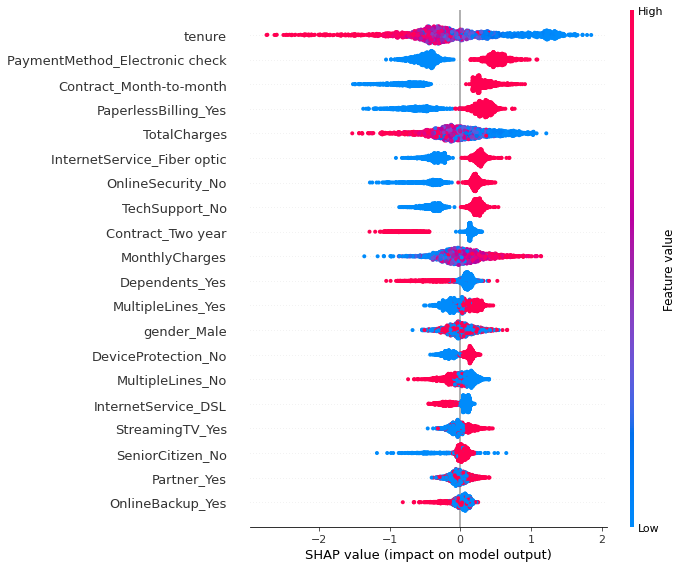

In [148]:
interpret_model(tuned_catboost)

In [107]:
explainer = shap.KernelExplainer(tuned_catboost.predict, data=shap.kmeans(X_train_smote_pre,100))
#shap_values = explainer.shap_values(X_test_pre)

In [108]:
shap_values = explainer.shap_values(X_test_pre)

  0%|          | 0/1796 [00:00<?, ?it/s]

In [139]:
df.select_dtypes('object').head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Male,No,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)


In [122]:
categorical_names = pd.get_dummies(df.select_dtypes('object')).columns.to_list()
len(categorical_names)

43

In [124]:
columns = numeric_features + categorical_names
X_test_pre_df = pd.DataFrame(X_test_pre, columns=columns).head(3)
X_test_pre_df

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.050618,-1.551203,-0.70867,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.191048,1.426208,1.53743,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.646136,0.279914,0.74977,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


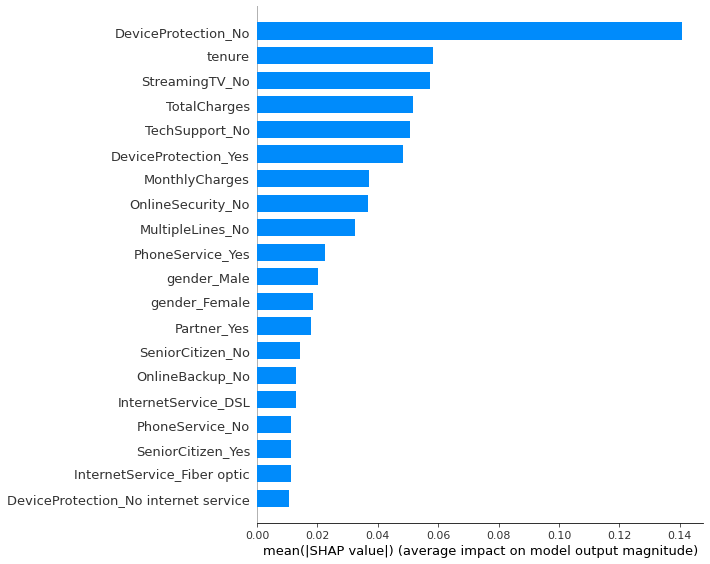

In [125]:
shap.summary_plot(shap_values, X_test_pre_df, plot_type='bar')
#global_shap_importance(tuned_catboost, X_train_smote_pre)

In [147]:
# summarize the effects of all the features
#shap.summary_plot(shap_values, X_test_pre)

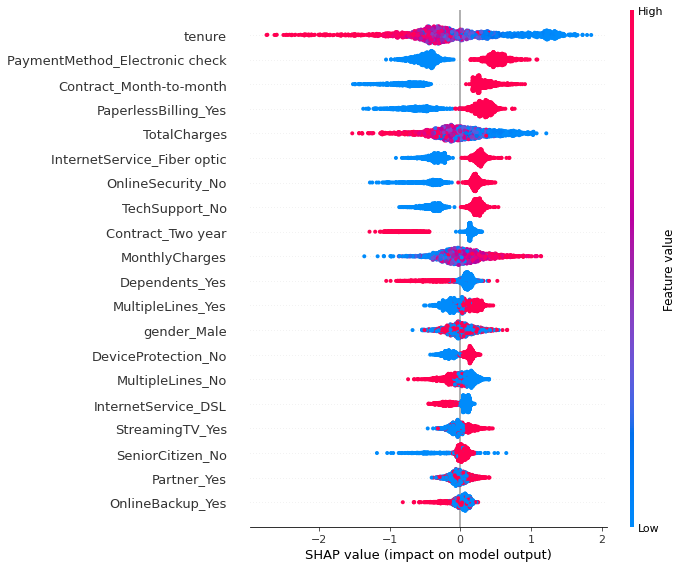

In [134]:
#shap.dependence_plot(ind='DeviceProtection_No', interaction_index='tenure',
#                     shap_values=shap_values, 
#                     features=X_test_pre,  
#                     display_features=X_test_pre)

interpret_model(tuned_catboost)

In [140]:
#interpret_model(tuned_lightgbm, plot='msa')
df['DeviceProtection'].value_counts()

No                     2640
Yes                    2055
No internet service    1291
Name: DeviceProtection, dtype: int64

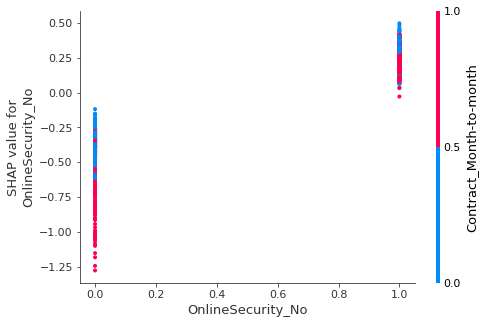

In [149]:
# global_shap_importance(tuned_lightgbm,  X_train):
interpret_model(tuned_catboost, plot = 'correlation', feature = 'OnlineSecurity_No')

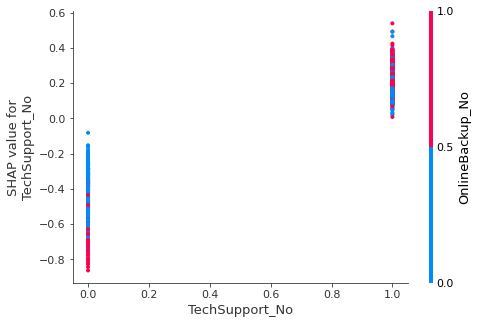

In [150]:
# global_shap_importance(tuned_lightgbm,  X_train):
interpret_model(tuned_catboost, plot = 'correlation', feature = 'TechSupport_No')